## Helper Functions

In [1]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


## Import libraries

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns; sns.set(color_codes=True)

## Dataset

In [5]:
import pandas as pd 
#Load Iris dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
dfIris = pd.read_csv(fileURL, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"], header=None)
iris = dfIris.dropna()
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


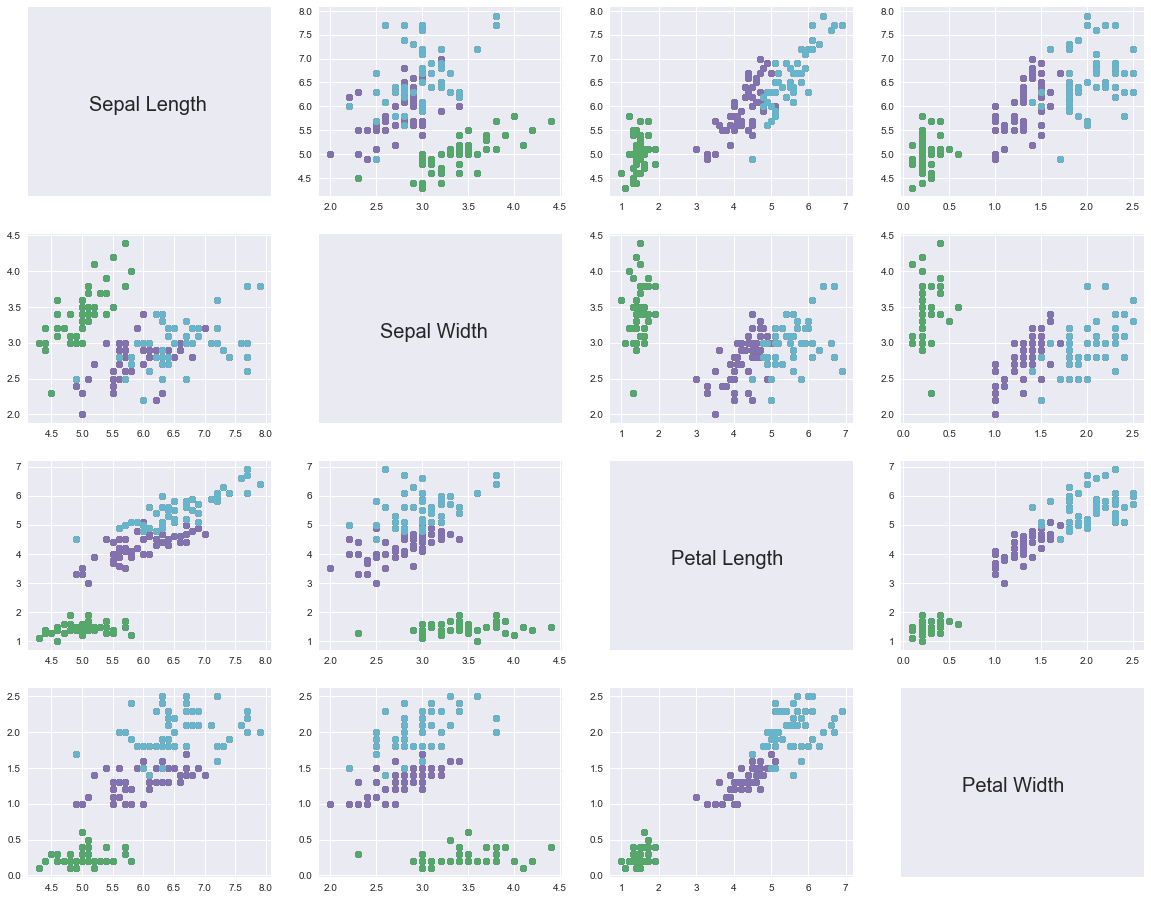

In [6]:
pairs (iris)

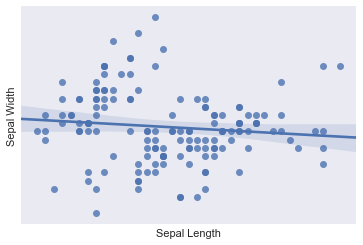

Coefficients :  [[-0.05972832]]
Mean squared error: 0.25
Variance score : -0.17


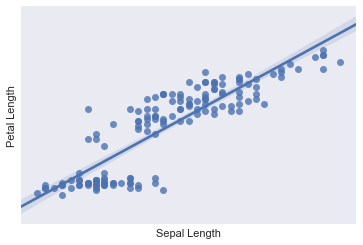

Coefficients :  [[ 1.87776638]]
Mean squared error: 0.99
Variance score : 0.67


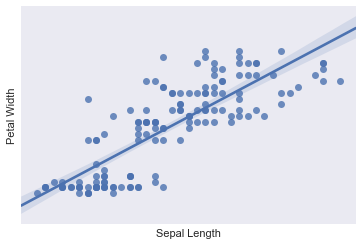

Coefficients :  [[ 0.76445545]]
Mean squared error: 0.17
Variance score : 0.65


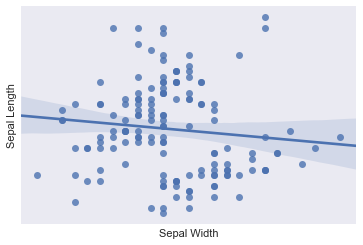

Coefficients :  [[-0.23819649]]
Mean squared error: 0.66
Variance score : -0.00


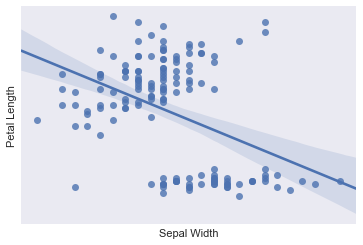

Coefficients :  [[-1.65125888]]
Mean squared error: 2.17
Variance score : 0.27


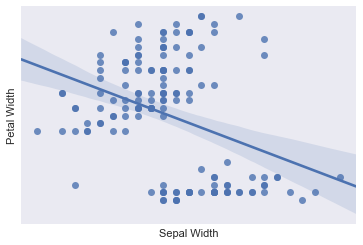

Coefficients :  [[-0.5868168]]
Mean squared error: 0.36
Variance score : 0.25


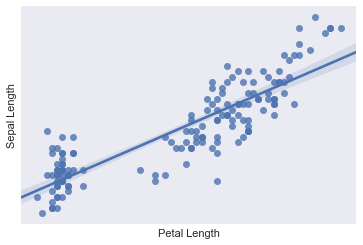

Coefficients :  [[ 0.41520246]]
Mean squared error: 0.22
Variance score : 0.67


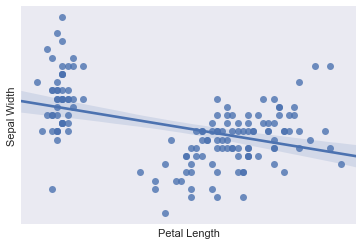

Coefficients :  [[-0.09155424]]
Mean squared error: 0.19
Variance score : 0.10


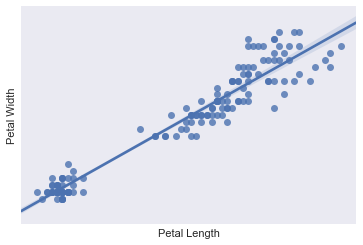

Coefficients :  [[ 0.4227209]]
Mean squared error: 0.04
Variance score : 0.93


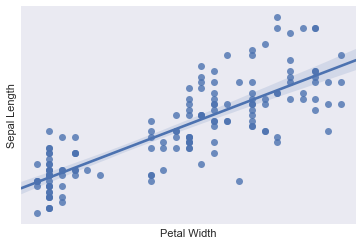

Coefficients :  [[ 0.87619387]]
Mean squared error: 0.22
Variance score : 0.66


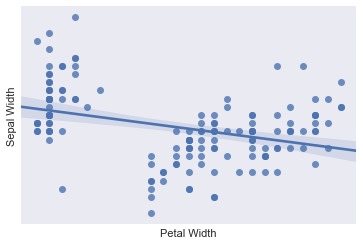

Coefficients :  [[-0.16865356]]
Mean squared error: 0.20
Variance score : 0.05


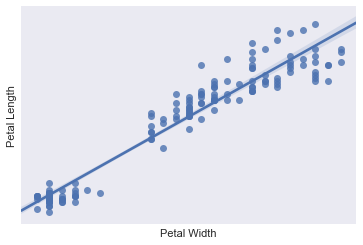

Coefficients :  [[ 2.1912069]]
Mean squared error: 0.22
Variance score : 0.93


In [7]:
for i in range(0,4):
    data = iris.iloc[:,i:i+1] 
    x = list(data)[0]
    for j in range (0,4):
        if (i!=j):
            target = iris.iloc[:,j:j+1]
            y = list(target)[0]
            seed(1)
            X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
            # fit a model
            lm = linear_model.LinearRegression()
            model = lm.fit(X_train, y_train)
            predictions = lm.predict(X_test)
            # Plot outputs
            #plt.scatter(X_test, y_test, color='black')
            #plt.plot(X_test, predictions, color='blue')
            ax = sns.regplot(x= x, y= y, data=iris)
            
            plt.xticks(())
            plt.yticks(())
            #plt.xlabel(x)
            #plt.ylabel(y)

            plt.show()
            # The coefficients:
            print ('Coefficients : ', lm.coef_) 
            # The mean squared error: 
            print("Mean squared error: %.2f"
            % mean_squared_error(y_test, predictions))
            # Explained variance score: 1 is perfect prediction
            print ('Variance score : %.2f' % 
            model.score(X_test, y_test))

Below is the plot of the best overall linear regression model along with model statistics from the combinations generated      in the prevous question


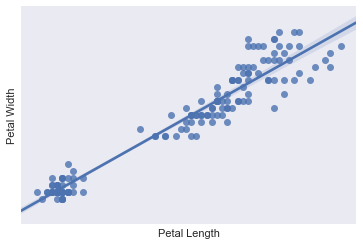

Coefficients :  [[ 0.4227209]]
Mean squared error: 0.04
Variance score : 0.93


In [10]:
#Fixing Petal Width as a target variable:
target = iris[['Petal Width']]
predictors = iris[['Petal Length']]
seed(1)

print("Below is the plot of the best overall linear regression model along with model statistics from the combinations generated      in the prevous question")
ax = sns.regplot(x = 'Petal Length' , y = 'Petal Width' , data=iris)
plt.xticks(())
plt.yticks(())
plt.show()
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
# The coefficients:
print ('Coefficients : ', lm.coef_) 
# The mean squared error: 
print("Mean squared error: %.2f"
% mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print ('Variance score : %.2f' % 
model.score(X_test, y_test))

### Solution 1

##### Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.


Based upon the linear models generated, the pair of features which appear to be most predictive for one another are 'Petal Width' and 'Petal Length', where 'Petal Width' is the target variable and 'Petal Length' is the predictor. This is the most predictive pair because it gives the lowest mean squared error (4%) compared to other combinations.

### Solution 2

###### Suppose you tried to generate a classiﬁcation model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature aﬀect the classiﬁcation performance?

The feature we were best able to predict based upon other features is 'Petal Width'. On removing this feature, there would not be a significant effect on the classification performance. This is because even if we remove 'Petal Width' from the features, most of the information given by 'Petal Width' feature can also be provided by a combination of the other 3 features('Petal Length', 'Sepal Length', 'Speal Width'). So in this way, the classification performance will not be highly impacted.